# Lab 8 : Star Formation 

In [1]:
import numpy as np
from astropy import units as u
from astropy import constants as const

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

# Part A

Create a function that returns the SFR for a given luminosity (NUV, FUV, TIR, Halpha)

$Log( {\rm SFR} (M_\odot/year)) = Log(Lx (erg/s)) - Log(Cx)$ 

Including corrections for dust absorption 

Kennicutt & Evans 2012 ARA&A Equation 12 and Table 1, 2

In [2]:
def StarFormationRate(L, Type, TIR = 0):
    """function that returns the SFR for a given luminoisty of a galaxy, following
    kennicutt & evans 2012 Eq12 (ARA&A 50)
    
    input
    L: float luminosity of the galaxy in erg/s
    Type: str; type of waveband, either 'FUV', 'NUV', TIR, Halpha
    TIR: float, total infrared luminosity in erg/s (default = 0)
    
    output
    SFR: float, log of star formation rate in Msun/yr
    """
    if Type == 'FUV':
        logCx = 43.35 # calibration from LFUV to SFR
        TIRc = 0.46 # correction factor for dust absorbtion
    elif Type == 'NUV':
        logCx = 43.17 # calibration from LNUV to SFR
        TIRc = 0.27 # correction factor for dust absorbtion
    elif Type == 'Halpha':
        logCx = 41.27
        TIRc = 0.0024
    elif Type == 'TIR':
        logCx = 43.41
        TIRc = 1
    else:
        print('Type not recognized. Expected- either "FUV", "NUV", "TIR", "Halpha"')  
    
    # correct the luminosity for dust absorption
    Lcorr = L + TIRc*TIR

    #star formation rate
    SFR = np.log10(Lcorr.value) - logCx

    return SFR


Let's try to reproduce SFRs derived for the WLM Dwarf Irregular Galaxy using UV luminosities measured with Galex. 

Compare results to Table 1 from Lee et al. 2009 (who used the older Kennicutt 98 methods)
https://ui.adsabs.harvard.edu/abs/2009ApJ...706..599L/abstract

We will use galaxy properties from NED (Photometry and SED):
https://ned.ipac.caltech.edu/

In [3]:
# First need the Luminosity of the Sun in the right units
LsunErgS = const.L_sun.to(u.erg/u.s)
LsunErgS

<Quantity 3.828e+33 erg / s>

In [4]:
#  WLM Dwarf Irregular Galaxy
NUV_WLM = 1.71e7 * LsunErgS #from NED GALEX data
TIR_WLM = 2.48e6 * LsunErgS + 3.21e5 * LsunErgS + 2.49e6* LsunErgS #from NED IRAS data
# TIR = NIR + MIR + FIR


In [5]:
StarFormationRate(NUV_WLM, 'NUV', TIR_WLM) 

-2.319186168309912

# Part B Star formation main sequence

1) Write a function that returns the average SFR of a galaxy at a given redshift, given its stellar mass

2) What is the average SFR of a MW mass galaxy today? at z=1?

3) Plot the SFR main sequence for a few different redshifts from 1e9 to 1e12 Msun.


From Whitaker 2012:

log(SFR) = $\alpha(z)({\rm log}M_\ast - 10.5) + \beta(z)$

$\alpha(z) = 0.7 - 0.13z$

$\beta(z) = 0.38 + 1.14z - 0.19z^2$

# Step 1

In [7]:
def SFRMainSequece(Mstar, z):
    """function that returns the SFR for a given stellar mass of a galaxy
    following the main sequence of star forming galaxies.
    
    input
    Mstar: float, stellar mass of the galaxy in Msun
    z: float, redshift of the galaxy

    output:
    SFR: float, log of star formation rate in Msun/yr
    """

    # fitting params
    alpha = 0.7 - 0.13*z
    beta = 0.38 + 1.14*z - 0.19*z**2

    SFR = alpha * (np.log10(Mstar) - 10.5) + beta

    return SFR


# Step 2

In [11]:
# MW at z=0
MWmstar = 7.5e10 
print(SFRMainSequece(MWmstar, 0))
print(10**SFRMainSequece(MWmstar, 0))

0.64254288437419
4.390792203431891


In [12]:
# MW at z = 1
print(SFRMainSequece(MWmstar, 1))
print(10**SFRMainSequece(MWmstar, 1))

1.5437849201332692
34.97719031976979


# Step 3

In [13]:
# create an array of stellar masses
Mass = np.linspace(1e8, 1e12)

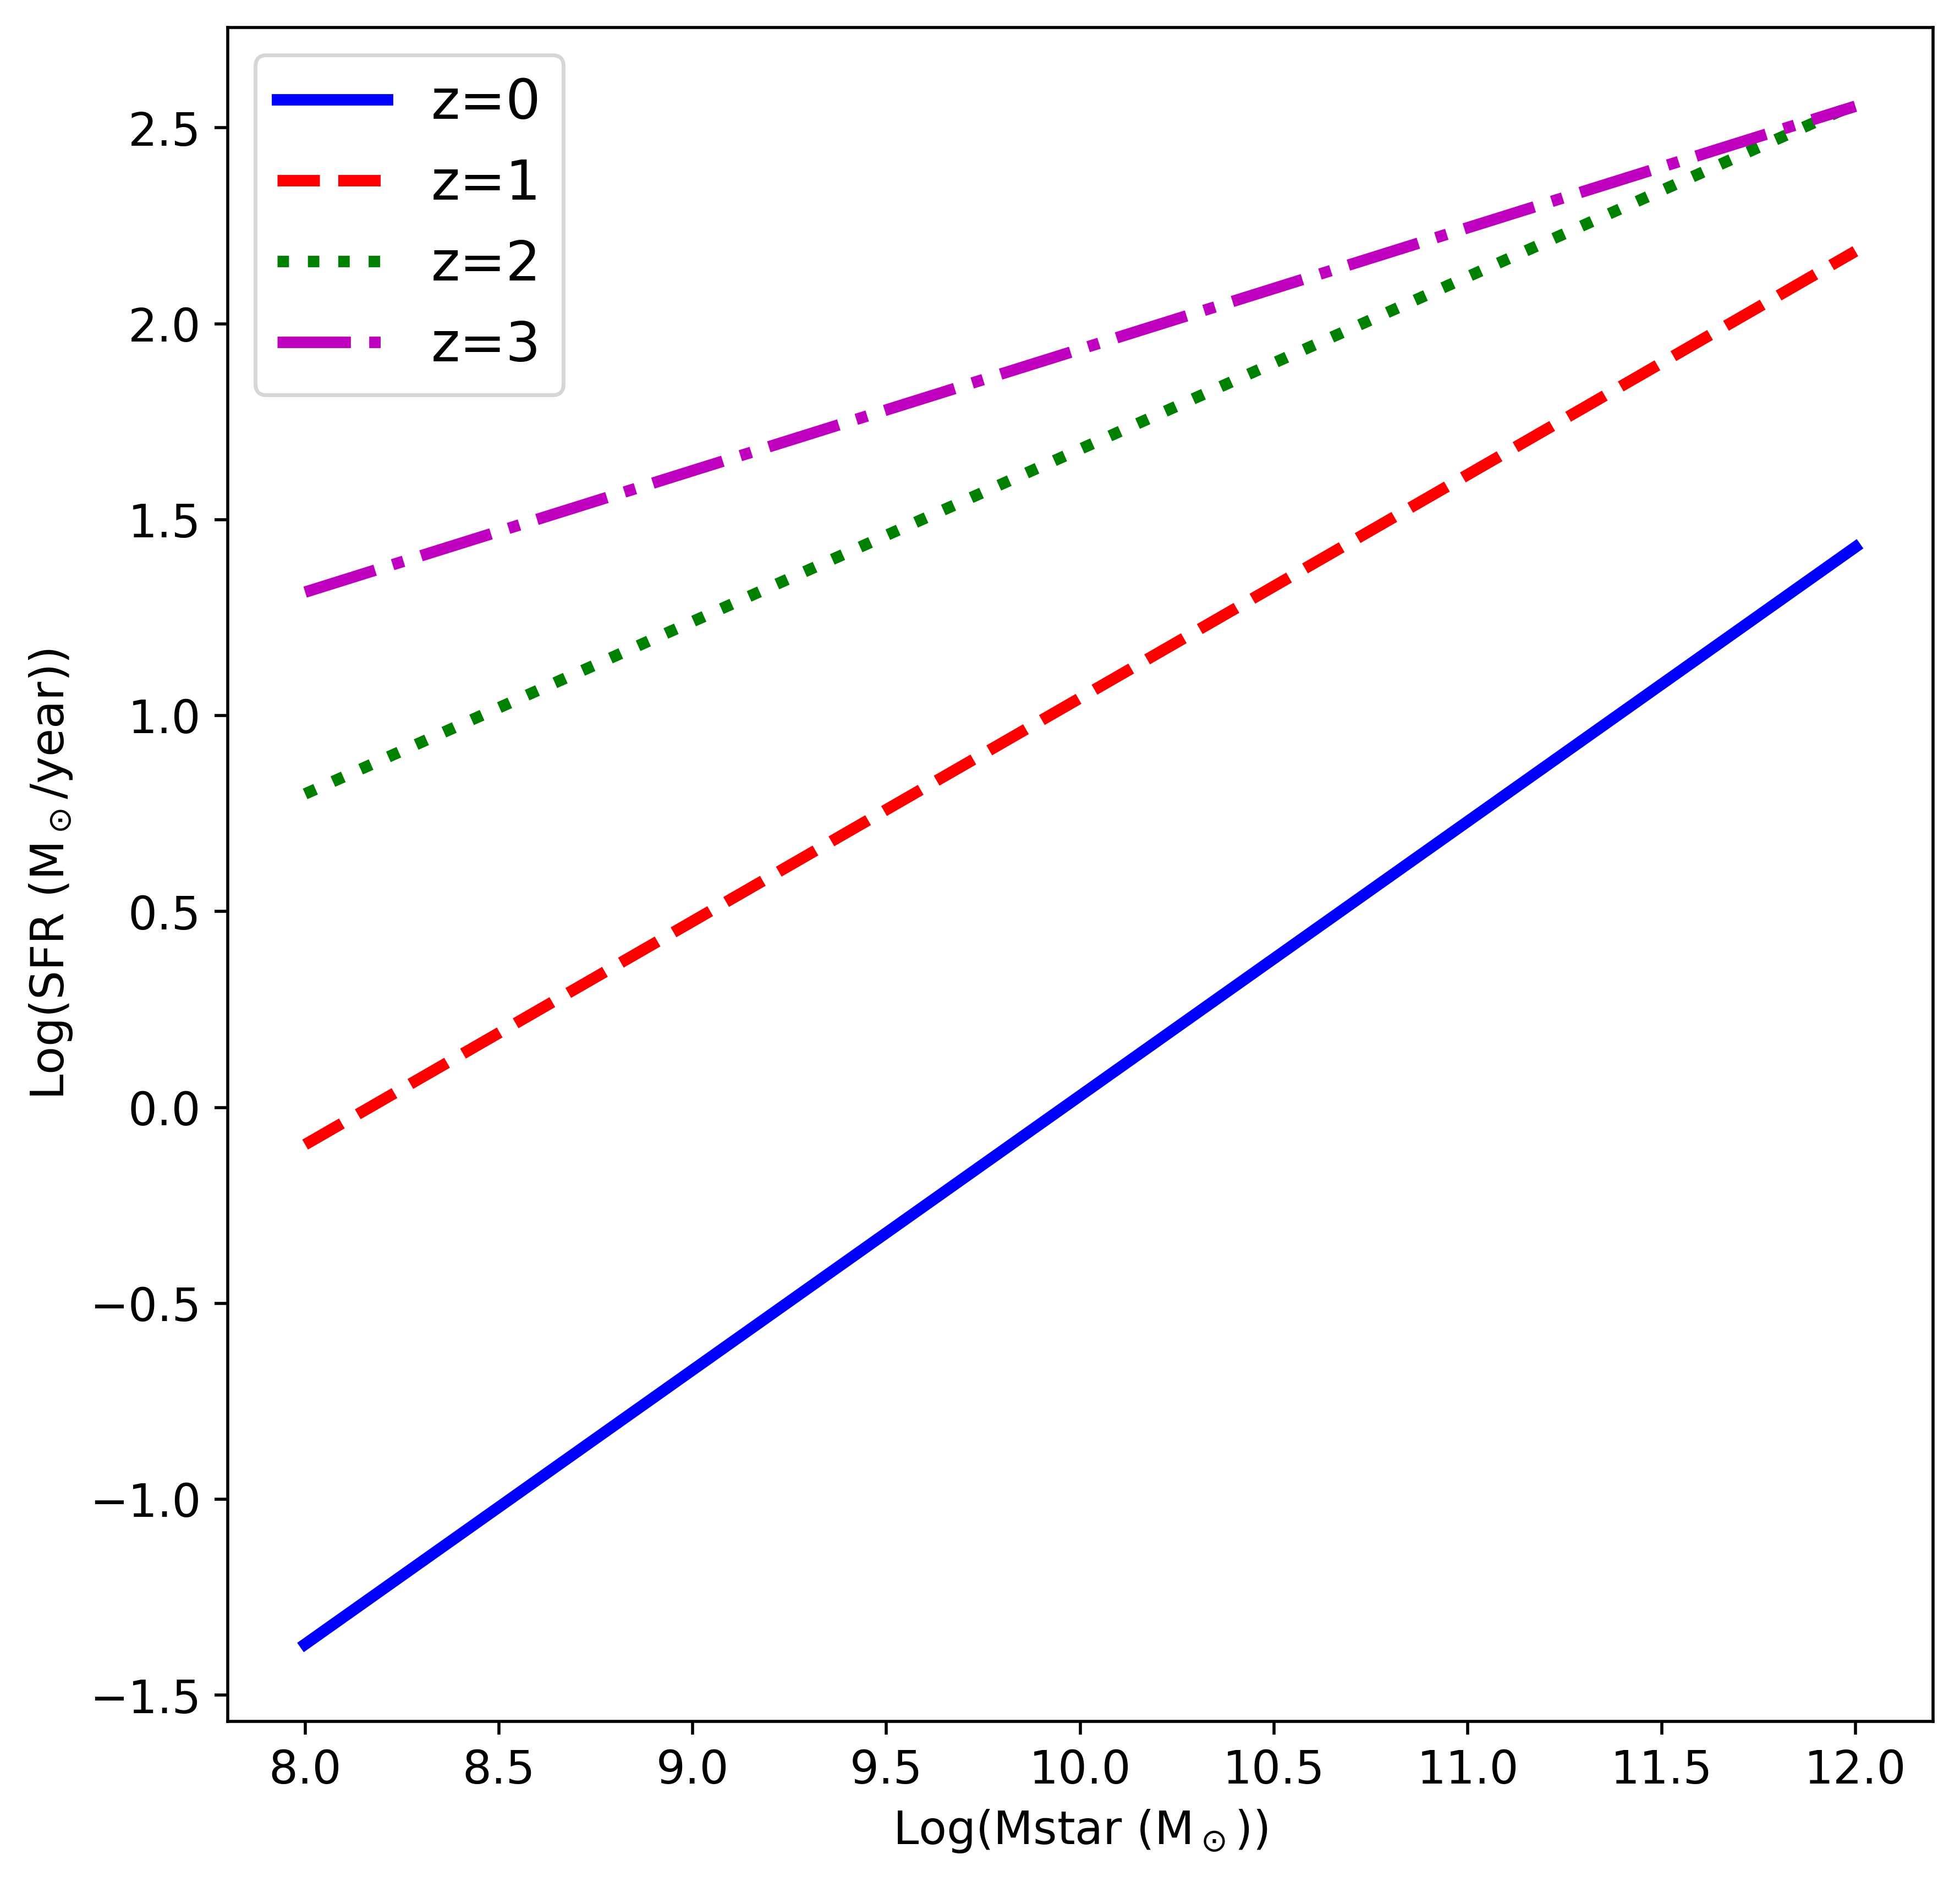

In [18]:

fig = plt.figure(figsize=(8,8), dpi=500)
ax = plt.subplot(111)

# add log log plots
plt.plot(np.log10(Mass), SFRMainSequece(Mass, 0), color = "b", lw = 3, ls = "-", label='z=0')
plt.plot(np.log10(Mass), SFRMainSequece(Mass, 1), color = "r", lw = 3,  ls = "--", label='z=1')
plt.plot(np.log10(Mass), SFRMainSequece(Mass, 2), color = "g", lw = 3, ls = ':', label='z=2')
plt.plot(np.log10(Mass), SFRMainSequece(Mass, 3), color = "m", lw = 3, ls = '-.', label='z=3')

# Add axis labels
plt.xlabel('Log(Mstar (M$_\odot$))', fontsize=12)
plt.ylabel('Log(SFR (M$_\odot$/year))', fontsize=12)


#adjust tick label font size
label_size = 12
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size

# add a legend with some customizations.
legend = ax.legend(loc='upper left',fontsize='x-large')


# Save file
plt.savefig('/Users/swapnaneeldey/Desktop/ASTR400Bfiles/ASTR400B/Labs/Lab8/Lab8_SFR_MainSequence.png')


# Part C  Starbursts

Use your `StarFormationRate` code to determine the typical star formation rates for the following systems with the listed Total Infrared Luminosities (TIR): 

Normal Galaxies: $10^{10}$ L$_\odot$

LIRG: $10^{11}$ L$_\odot$

ULIRG: $10^{12} $ L$_\odot$

HLIRG: $10^{13} $ L$_\odot$

In [19]:
# normal galaxies 
TIR_Normal = 1e10 * LsunErgS
print(10**StarFormationRate(TIR_Normal, 'TIR'))

1.4892648150381245


In [21]:
# LIRGs  
TIR_LIRG = 1e11 * LsunErgS
print(10**StarFormationRate(TIR_LIRG, 'TIR'))


14.892648150381245


In [22]:
# ULIRGs
TIR_ULIRG = 1e12 * LsunErgS
print(10**StarFormationRate(TIR_ULIRG, 'TIR'))

148.92648150381245


In [20]:
# HLIRGs
TIR_HLIRG = 1e13 * LsunErgS
print(10**StarFormationRate(TIR_HLIRG, 'TIR'))

1489.2648150381244
